[*********************100%***********************]  2 of 2 completed


         Adjusted Price  Percentage Change
Ticker                                    
BTC-USD    62233.046875           0.162683
ETH-USD     2459.894043           0.821907


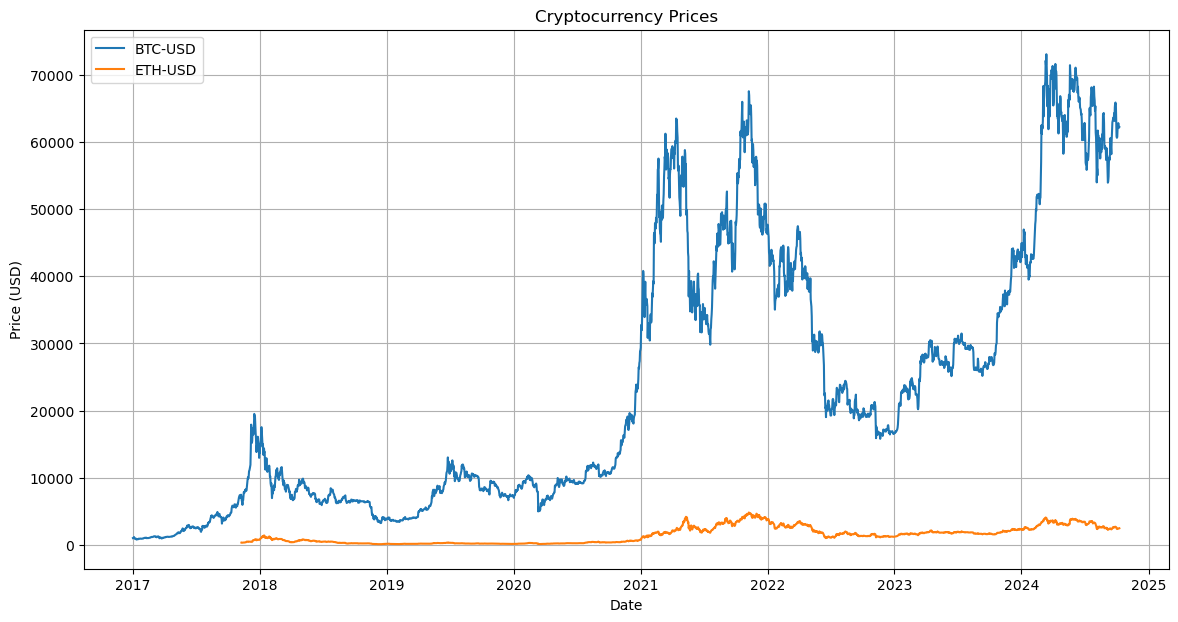

Ticker    BTC-USD   ETH-USD
Ticker                     
BTC-USD  1.000000  0.777338
ETH-USD  0.777338  1.000000


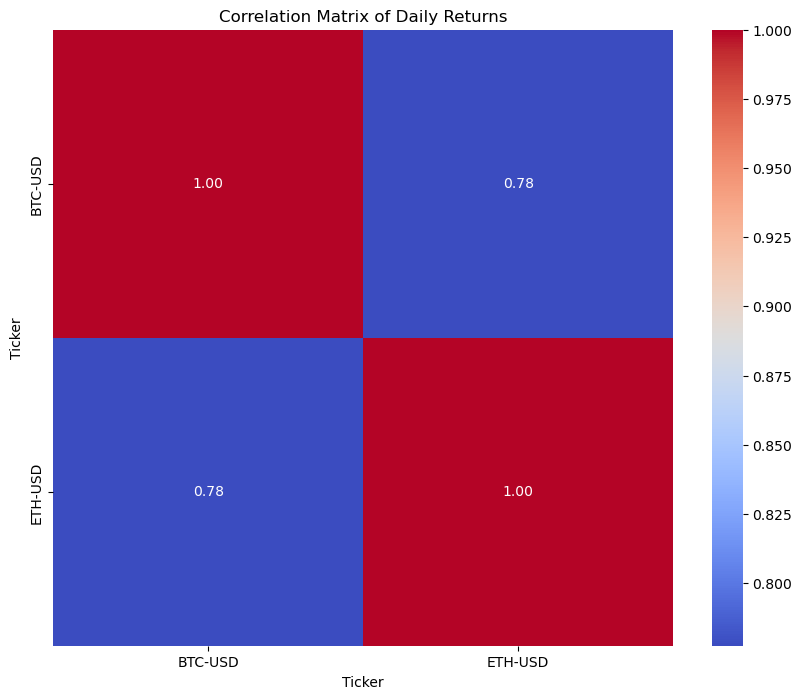

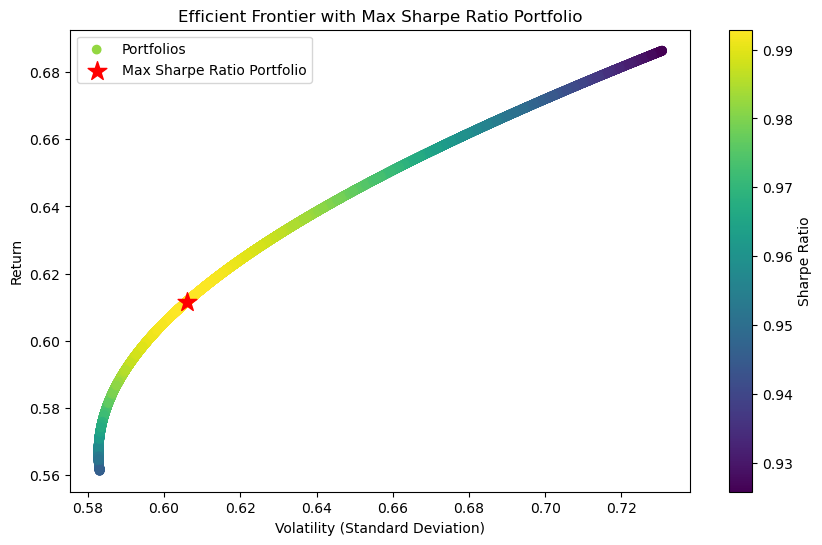

Optimal Portfolio Weights:
BTC-USD: 59.72%
ETH-USD: 40.28%


C:\Users\Dell\AppData\Local\Temp\ipykernel_20276\893172522.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


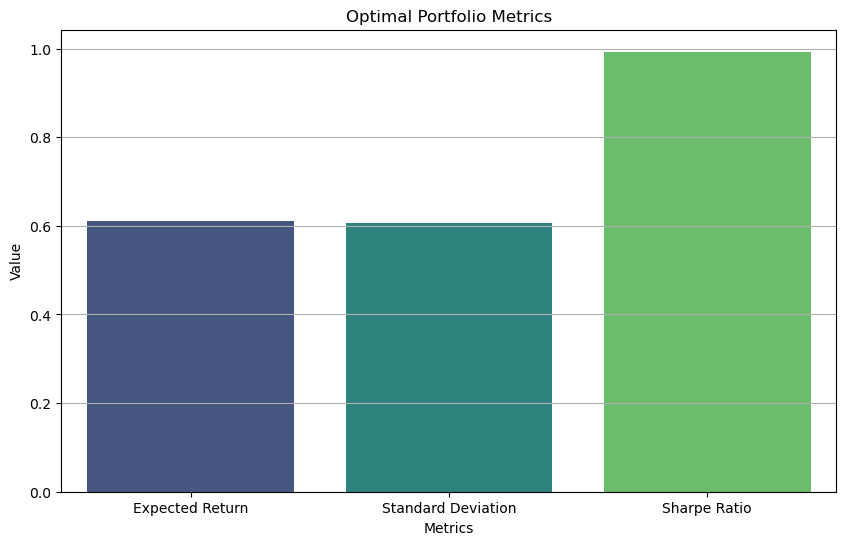

Expected Return: 61.17%
Standard Deviation: 60.60%
Sharpe Ratio: 0.99


In [67]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Collect data for 10 cryptocurrencies
cryptos = ['BTC-USD', 'ETH-USD' ]

# Download historical data
data = yf.download(cryptos, start='2017-01-01')['Adj Close']

# Step 2: Calculate percentage change
percent_change = data.pct_change().dropna() * 100

# Step 3: Create a table with adjusted prices and % change
summary_table = pd.DataFrame({
    'Adjusted Price': data.iloc[-1],
    'Percentage Change': percent_change.iloc[-1]
})

print(summary_table)

# Step 4: Plot the price of all cryptocurrencies
plt.figure(figsize=(14, 7))
for crypto in cryptos:
    plt.plot(data[crypto], label=crypto)
plt.title('Cryptocurrency Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Step 5: Calculate daily returns
daily_returns = data.pct_change().dropna()

# Step 6: Create a correlation matrix
correlation_matrix = daily_returns.corr()
print(correlation_matrix)

# Step 7: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Daily Returns')
plt.show()

# Step 8: Calculate the optimal portfolio based on Sharpe ratio
risk_free_rate = 0.01  # Assuming a risk-free rate of 1%
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []  # Initialize weights_record here

for i in range(num_portfolios):
    weights = np.random.random(len(cryptos))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights, mean_returns) * 365  # Annualized return
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Annualized std dev
    
    # Store results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev  # Sharpe ratio
    weights_record.append(weights)

# Step 9: Plot the efficient frontier
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')

# Highlight the maximum Sharpe ratio portfolio
max_sharpe_idx = results[2].argmax()
sdp, rp = results[1,max_sharpe_idx], results[0,max_sharpe_idx]
plt.scatter(sdp, rp, color='red', marker='*', s=200, label='Max Sharpe Ratio Portfolio')

plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier with Max Sharpe Ratio Portfolio')
plt.legend()  # This will now work correctly
plt.show()

# Optimal portfolio weights
optimal_weights = weights_record[max_sharpe_idx]
print("Optimal Portfolio Weights:")
for i, crypto in enumerate(cryptos):
    print(f"{crypto}: {optimal_weights[i]:.2%}")

# Step 10: Calculate expected return and standard deviation of the optimal portfolio
expected_return = np.dot(optimal_weights, mean_returns) * 365  # Annualized expected return
portfolio_std_dev = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))) * np.sqrt(252)  # Annualized std dev
sharpe_ratio = (expected_return - risk_free_rate) / portfolio_std_dev  # Sharpe ratio

# Step 11: Create beautiful illustrations for the metrics
metrics = {
    'Expected Return': expected_return,
    'Standard Deviation': portfolio_std_dev,
    'Sharpe Ratio': sharpe_ratio
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Optimal Portfolio Metrics')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.grid(axis='y')
plt.show()


# Display the metrics
print(f"Expected Return: {expected_return:.2%}")
print(f"Standard Deviation: {portfolio_std_dev:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")